## Monte Carlo Simulations for forecasting Stock Returns

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

In [7]:
# Get the dataset, ticker: VOO (Vanguard S&P 500 ETF)
df = yf.download(tickers='VOO', start='2019-01-02', end='2022-12-24')
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,226.179993,230.850006,226.020004,229.990005,209.174652,4891300
2019-01-03,228.100006,228.419998,223.970001,224.500000,204.181473,3329600
2019-01-04,227.539993,232.619995,227.149994,231.910004,210.920914,5100100
2019-01-07,232.289993,235.229996,231.320007,233.649994,212.503372,3706000
2019-01-08,236.050003,236.460007,233.429993,235.919998,214.567947,3546600
...,...,...,...,...,...,...
2022-12-19,354.130005,354.339996,349.250000,350.809998,340.236450,5538500
2022-12-20,348.450012,351.170013,347.209991,349.670013,340.754852,5068200
2022-12-21,352.200012,355.950012,351.700012,354.899994,345.851532,3832400


In [23]:
### Simulate future paths

# Simulation Parameters
num_simulations = 10
forecast_days = 365

# Initialize the simulation array with all zeros
simulations = np.zeros((num_simulations, forecast_days))

# Get the last adjusted close price
last_price = df['Adj Close'].iloc[-1]

# Calculate the daily returns and drop and remove any NA values
daily_returns = df['Adj Close'].pct_change().dropna()

In [24]:
# Loop through the number of simulations to forecast future cumulative returns for this asset (VOO)
for i in range(num_simulations):
    # Get random daily returns of size forecast days and return its cumulative returns 
    # Return an array of size forecast_days that contains randomly selected daily and calculate that cumulative returns
    cumulative_returns = np.random.choice(daily_returns, size=forecast_days, replace=True).cumsum()
    # Get the number of simulations with the random cumulative returns 
    simulations[i, :] = last_price * (1 + cumulative_returns)

print(simulations)

[[342.04274409 344.67521063 341.48544062 ... 455.50497589 455.30360263
  456.89911214]
 [346.70058276 347.52028807 348.85257557 ... 453.53450848 436.53323776
  440.60873117]
 [345.2025126  347.53559311 347.26956224 ... 479.34323085 482.34737817
  480.22281673]
 ...
 [344.74443858 348.09670052 345.53522411 ... 454.49331039 462.89453785
  454.85861021]
 [342.69166731 340.4988504  349.96246675 ... 485.58392887 492.40054981
  490.69122053]
 [345.26863505 342.74949452 344.32163297 ... 456.34137881 465.3208818
  455.01919235]]


In [25]:
# For simulation '3', show the first 4 random cumulative returns out of the 365 random cumulative returns, starting from index 0 upto but not including, 4
print(simulations[2,0:4])

[345.2025126  347.53559311 347.26956224 347.48038997]


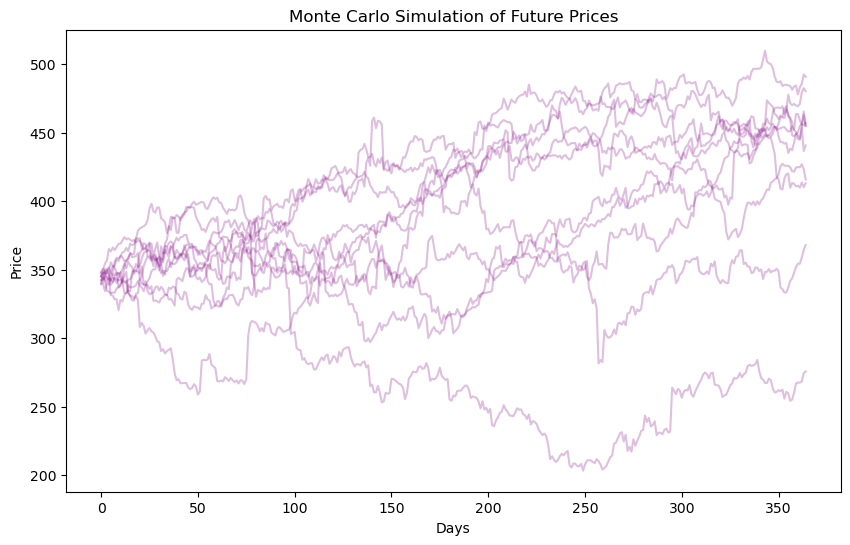

In [26]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(simulations.T, color='purple', alpha=0.25)
plt.title("Monte Carlo Simulation of Future Prices")
plt.xlabel("Days")
plt.ylabel('Price')
plt.show()

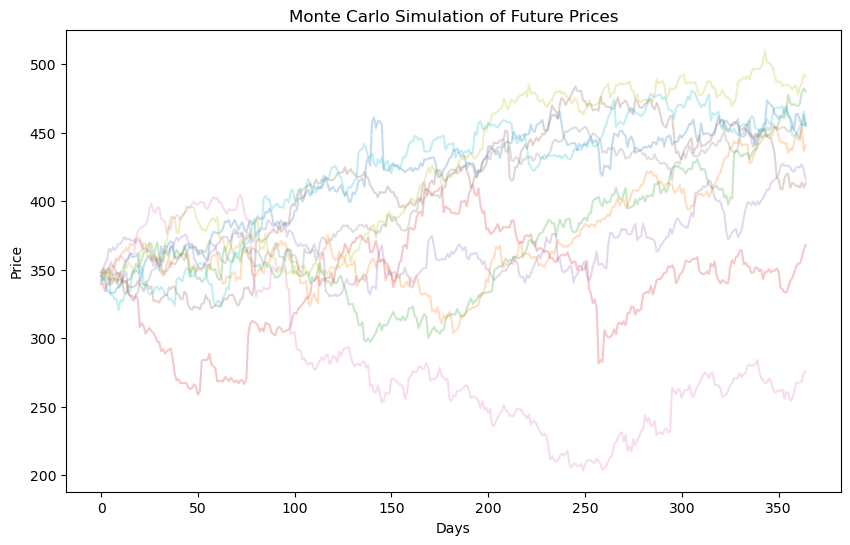

In [27]:
# Plot the results
plt.figure(figsize=(10, 6))
for i in range(num_simulations):
    plt.plot(simulations[i], alpha=0.25)
plt.title("Monte Carlo Simulation of Future Prices")
plt.xlabel("Days")
plt.ylabel('Price')
plt.show()